Hola **Andrea**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo Data Analyst debes cuidar la presentación de tus notebooks, siempre incluye un título al inicio que deje claro el objetivo del proyecto y una sección introductoria al mismo
</div>

# Evaluación De La Efectividad De Un Sistema De Recomendación En Un Sitio Web: Un Estudio De Prueba A/B

# INTRODUCCIÓN

Los sistemas de recomendación son herramientas fundamentales en la personalización de la experiencia del usuario en los sitios web. Sin embargo, la efectividad de estos sitemas puede variar dependiendo de varios factores, como la calidad de los algoritmos de recomendación y la relevancia de los contenidos recomendados.

En este proyecto, se evaluará la efectividad de un sistema de recomendación en un sitio web a través de una pruebaa A/B. El objetivo principal es determinar si el sistema de recomendación es capaz de mejorar la experiencia del usuario y aumentar la conversión en el sitio web.

La prueba A/B se realizará comparando dos versiones del sitio web: una con el sistema de recomendación activado y otra sin él. Se analizarán los resultados de la prueba para determinar la efectividad del sistema de recomendación y se presentarán recomendaciones para su mejora.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, así es mucho más claro el objetivo del proyecto y que se hará en el mismo
</div>

In [26]:
# importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import mannwhitneyu


In [27]:
#carga de datasets
marketing=pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
new=pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
events=pd.read_csv('/datasets/final_ab_events_upd_us.csv')
participants=pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

- Instrucciones para completar la tarea
Describe los objetivos del estudio.
- El objetivo es evaluar la efectividad de un sistema de recomendaciones mejorado en una tienda en línea, medido por la conversión en vistas de la página del producto, instancias de agregar artículos al carrito de compras.

- Explora los datos:
- ¿Es necesario convertir los tipos?
- ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?

# observación y exploración de los datos.

In [28]:
marketing.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [29]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


# vamos a convertir las dos columnas (start_dt, finish_dt) tipo object a datetime ya que el contenido de esta columna es fecha; para en un futuro poder accedr a estos datos sin inconveniente.

In [30]:
marketing[['start_dt','finish_dt']]=marketing[['start_dt','finish_dt']].apply(pd.to_datetime)
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [31]:
marketing.isnull().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [32]:
marketing.duplicated().sum()

0

- bueno los datos de este data estan limpios por esta parte.

In [33]:
new.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [34]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


- valores ausentes no hay.
- se debe convertir los datos al tipo correcto en la columna (first_date)

In [35]:
new['first_date']=pd.to_datetime(new['first_date'])
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [36]:
new.duplicated().sum()

0

- no existen valores duplicados.

In [37]:
events.describe()

,details
count,60314.000000
mean,23.881219
std,72.228884
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


- con los valores observado de la media (23.88) y mediana(4.99) esto sugiere que la distribución de los datos es sesgada hacia la derecha, es decir, hay valores atípicos que están influyendo en la media.
- En general, estos datos estadísticos descriptivos sugieren que los datos están distribuidaoss de manera sesgada y con gran variabilidad, la mayor parte de los datos se concentra en valores bajos.

In [38]:
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [39]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


- se deben corregir dos factores 1ro, la columna (event_dt) realizar la conversión a tipo datetime paara acceder a los datos de la misma.
- 2do se observan valores ausentes(NAN) en la columna (datails) le vamos a dar manejo de una manera espcial ya que se presentan gran cantidad de valores ausentes.

In [40]:
events['event_dt']=pd.to_datetime(events['event_dt'])
print(events['event_dt'])

0        2020-12-07 20:22:03
1        2020-12-07 09:22:53
2        2020-12-07 12:59:29
3        2020-12-07 04:02:40
4        2020-12-07 10:15:09
                 ...        
423756   2020-12-30 19:35:55
423757   2020-12-30 10:54:15
423758   2020-12-30 10:59:09
423759   2020-12-30 09:53:39
423760   2020-12-30 11:36:13
Name: event_dt, Length: 423761, dtype: datetime64[ns]


In [41]:
events.isnull().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [42]:
events['details_indicador']=events['details'].isnull().astype(int)

- este código crea una nueva columna que tendra un valor de:
    1 si el valor en la columna "details" esta ausente(NAN)
    0 si el valor de la columna "details" esta presente
    
- esta opción se tomo ya que los valores ausentes son demasiados al reemplazarlos por 000 o la media habria un cambio notable en la distribución de los datos; de esta forma el indicador nos permite ralizar análisis y modelado con y sin valores ausentes lo que permite mayor flexibilidad; 
- Al no reemplazaar los valores ausentes con un valor específico, evito introducir sesgos en el análisis. 

In [43]:
events.isnull().sum()

user_id                   0
event_dt                  0
event_name                0
details              363447
details_indicador         0
dtype: int64

In [44]:
events.duplicated().sum()

0

- de esta manera los valores de este dataframe quedan listos para trabajar

In [45]:
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [46]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


- no hay precensia de valores ausentes.
- el tipo de dato de cada columna corresponde al contenido de la misma.


In [47]:
participants.duplicated().sum()

0

- ausencia de valores diplicados lo que nos resulta un df listo para iniciar nuestro análisis a profundidad

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la transformación de datos y la exploración inicial de los mismos, un dataset limpio es clave para una buena toma de decisiones en un experimento.
</div>

# Lleva a cabo el análisis exploratorio de datos:



In [48]:
merge_df.event_name.unique()

array(['purchase', 'product_page', 'login', 'product_cart'], dtype=object)

In [49]:
#Estudia la conversión en las diferentes etapas del embudo.
merge_df=pd.merge(events, participants, on='user_id')
#filtrado de eventos por grupo de prueba
group_a_df=merge_df[merge_df['group']=='A']
group_b_df=merge_df[merge_df['group']=='B']

# calculamos la conversión para cada etapa del embudo:
def calculate_conversion(df):
    product_page_count=len(df[df['event_name']=='product_page'])
    product_cart_count=len(df[df['event_name']=='product_cart'])
    purchase_count=len(df[df['event_name']=='purchase'])
    
    product_cart_conversion=(product_cart_count/product_page_count)*100
    purchase_conversion=(purchase_count/product_cart_count)*100
    
    return product_cart_conversion, purchase_conversion

group_a_conversion=calculate_conversion(group_a_df)
group_b_conversion=calculate_conversion(group_b_df)

#imprimir los resultados 
print("Conversión para el grupo de prueba A:")
print(f' - Product Cart: {group_a_conversion[0]:.2f}%')
print(f' - Purchase: {group_a_conversion[1]:.2f}%')
print()
print("Conversion para el grupo de prueba B:")
print(f" - Product Cart:{group_b_conversion[0]:.2f}%")
print(f" - Purchase:{group_b_conversion[1]:.2f}%")



Conversión para el grupo de prueba A:
 - Product Cart: 48.13%
 - Purchase: 107.43%

Conversion para el grupo de prueba B:
 - Product Cart:51.21%
 - Purchase:99.05%


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

La parte de la conversión debería ser calculada para cada etapa del embudo en cada grupo. Deberías tomar cómo evento inicial `login` y a partir de este ir calculando la conversión del resto. Por ejemplo si quieres la conversión de purchase respecto al evento inicial deberías tener `# usuarios purchase / # usuarios login`
    
Una gráfica también podría ayudar a entender mejor cómo se encuentra el embudo
</div>

# corrección

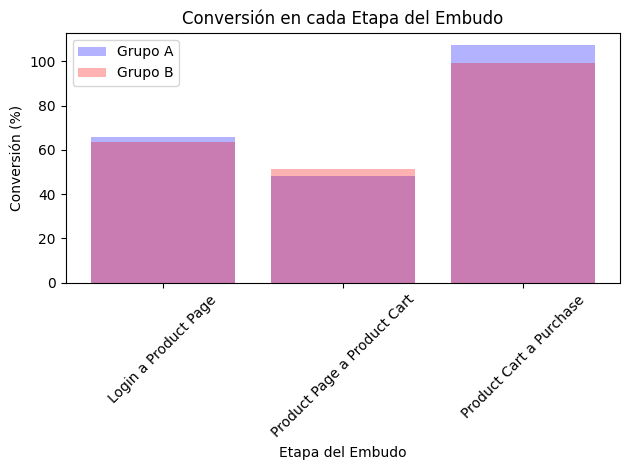

In [62]:

# Calcula la conversión para cada etapa del embudo
def calculate_conversion(df):
    login_count = len(df[df['event_name'] == 'login'])
    product_page_count = len(df[df['event_name'] == 'product_page'])
    product_cart_count = len(df[df['event_name'] == 'product_cart'])
    purchase_count = len(df[df['event_name'] == 'purchase'])

    login_to_product_page_conversion = (product_page_count / login_count) * 100
    product_page_to_product_cart_conversion = (product_cart_count / product_page_count) * 100
    product_cart_to_purchase_conversion = (purchase_count / product_cart_count) * 100

    return login_to_product_page_conversion, product_page_to_product_cart_conversion, product_cart_to_purchase_conversion

# Muestra los resultados en una gráfica


group_a_conversion = calculate_conversion(group_a_df)
group_b_conversion = calculate_conversion(group_b_df)


plt.bar(['Login a Product Page', 'Product Page a Product Cart', 'Product Cart a Purchase'], 
         [group_a_conversion[0], group_a_conversion[1], group_a_conversion[2]], 
         label='Grupo A', alpha=0.3, color='blue')  # Agrega alpha=0.5 para transparencia

plt.bar(['Login a Product Page', 'Product Page a Product Cart', 'Product Cart a Purchase'], 
         [group_b_conversion[0], group_b_conversion[1], group_b_conversion[2]], 
         label='Grupo B', alpha=0.3, color='red')  # Agrega alpha=0.5 para transparencia

plt.xlabel('Etapa del Embudo')
plt.ylabel('Conversión (%)')
plt.title('Conversión en cada Etapa del Embudo')
plt.legend()
plt.xticks(rotation=45)  # Agrega rotación a las etiquetas del eje x
plt.tight_layout()  # Ajusta el tamaño de la figura para que las etiquetas no se corten
plt.show()



- El grupo A tiene una ligera ventaja sobre el grupo B en la primera etapa del embudo, lo que sugiere que la experiencia del usuario es ligeramente más efectiva para el grupo A en esta etapa.
- en la segunda etapa del embudo ambos grupos tienen una conversión muy similar.
- Sin embargo, en la etapa final del embudo, ambos grupos tienen una conversión muy alta, lo que sugiere que la experiencia de compra es efectiva para ambos grupos.
- En general, podemos decir que el grupo A tiene una ligera ventaja sobre el grupo B en la primera etapa del embudo, pero que en las etapas posteriores, la diferencia se reduce y en ambos grupos tienen una experiencia de usuario efectiva.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Con esto se pude evidenciar mejor las diferencias entre los grupos
</div>

In [69]:
#¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
group_a_events_per_user=group_a_df.groupby('user_id')['event_name'].count().reset_index()
group_b_events_per_user=group_b_df.groupby('user_id')['event_name'].count().reset_index()

# renombramos las columnas 

group_a_events_per_user.columns=['user_id', 'num_events']
group_b_events_per_user.columns=['user_id', 'num_events']


# realizamos la prueba mann-whitney u:

u_statistic, p_value = mannwhitneyu(group_a_events_per_user['num_events'], group_b_events_per_user['num_events'])

print("Estadístico U:", u_statistic)
print("Valor p:", p_value)


# interpretación de resultados

alpha=0.05

if p_value < alpha:
    print("Rechazamos la hiótesis nula. Los datos sugieren que el número de eventos por usuario no está distribuido euitativamente entre las muestras.")
else:
    print("No rechazamos la hipótesis nula. Los datos sigieren que el número de eventos por usuario está distribuido equitativamente entre las muestras.")
    

Estadístico U: 25458558.5
Valor p: 1.4211342403215935e-05
Rechazamos la hiótesis nula. Los datos sugieren que el número de eventos por usuario no está distribuido euitativamente entre las muestras.


- hay una diferencia estadísticamente significativa en la distribución del número de eventos por usuario entre el grupo A y el grupo B.

In [70]:
#¿Hay usuarios que están presentes en ambas muestras?

# ID de usuarios únicos para cada grupo
group_a_users = set(group_a_df['user_id'].unique())
group_b_users = set(group_b_df['user_id'].unique())


# utilizamos la operación de intersección para encontrar los ID de usuario que están presentes en ambas muestras:

common_users = group_a_users.intersection(group_b_users)

# impresión de resultados 
print("Número de usuarios que están presentes en ambas muestras:",len(common_users))

Número de usuarios que están presentes en ambas muestras: 441


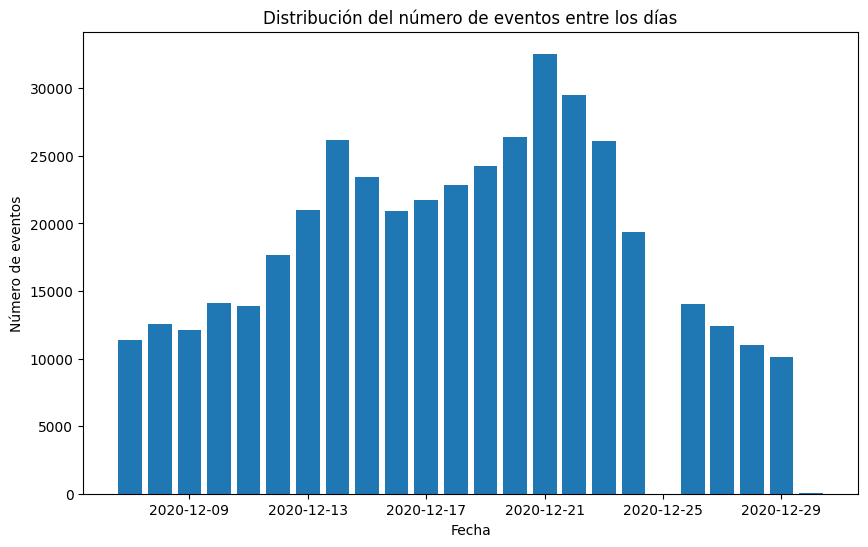

In [71]:
#¿Cómo se distribuye el número de eventos entre los días?
#agrupamos los evntos por día:

events_per_day = events.groupby(events['event_dt'].dt.date)['event_name'].count().reset_index()
events_per_day.columns=['date', 'num_events']

#visualizamos la distribución del número de eventos entre los días

plt.figure(figsize=(10,6))
plt.bar(events_per_day['date'], events_per_day['num_events'])
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.title('Distribución del número de eventos entre los días')
plt.show()


- la concentración presentadas sobre las fecha(2020-12-13 y 2020-12-21) fueron claves para el evento o campaña.

- Es posible que se tratara de una campaña de marketing, promoción o evento especial que generó un aumento en el número de eventos.

- ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

1- Distribución desigual de eventos:
la gráfica muestra una distribución desigual de eventos a lo largo del tiempo, con picos en las fechas(2020-12-13 y 2020-12-21); esto puede indicar que hubo eventos o campañas específicas que generaron un aumento en el número de eventos.

2. concentración de eventos en fechas específicas 
3. usuarios presentes en ambas muestras (441, puede indicar que hubo un sesgo en la asignación de usuarios a los grupos)
4. distribución no uniforme de eventos por usuario (la gráfica muestra que algunos usuarios tienen un número mucho mayor de eventos que otros.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizado el análisis de tus datos, planteaste gráficas con comentarios súper claros para entender lo que se está revisando en esta sección

# Evaluar los resultados de la prueba A/B:

In [72]:
#¿Qué puedes decir sobre los resultados de la prueba A/B?
#Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones.

# Unir los datos
data = pd.merge(new, events, on='user_id')
data = pd.merge(data, participants, on='user_id')

# Filtrar los datos para el grupo A y el grupo B
group_a = data[data['group'] == 'A']
group_b = data[data['group'] == 'B']

# Calcular las proporciones (p1 y p2)
p1 = len(group_a[group_a['event_name'] == 'purchase']) / len(group_a)
p2 = len(group_b[group_b['event_name'] == 'purchase']) / len(group_b)

# Calcular la prueba Z
z = (p1 - p2) / np.sqrt((p1 * (1-p1) / len(group_a)) + (p2 * (1-p2) / len(group_b)))

print('p1:', p1)
print('p2:', p2)
print('z:', z)


# Este código une y filtra, para obtener los datos para el grupo A y el grupo B.

# Luego, calcula las proporciones (p1 y p2) y la prueba Z utilizando las fórmulas que mencioné anteriormente.

# , imprime los valores de p1, p2 y z.

p1: 0.14681883996252448
p2: 0.14127750209593729
z: 2.5077537874421267


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

la prueba estadística debería ser aplicada a la conversión de cada etapa del embudo, si bien aplicarlo de manera general funciona para entender la conversión final siempre en pruebas AB se debe buscar aprender lo más que se pueda de los resultados que se obtuvo de cada grupo y lo mejor es ver cada etapa del embudo que siguieron los usuarios para ver si se cambia en algún la experiencia de los mismos

# CORRECCIÓN

In [73]:
etapas_embudo = [
    ('login', 'product_page'),
    ('product_page', 'product_cart'),
    ('product_cart', 'purchase')
]

eventos_embudo = [
    'login',
    'product_page',
    'product_cart',
    'purchase'
]


# Luego, podemos crear un bucle para calcular la prueba Z para cada etapa del embudo:


for i, etapa in enumerate(etapas_embudo):
    evento_inicio = etapa[0]
    evento_fin = etapa[1]

    # Filtrar los datos para el grupo A y el grupo B
    group_a_etapa = group_a[(group_a['event_name'] == evento_inicio) | (group_a['event_name'] == evento_fin)]
    group_b_etapa = group_b[(group_b['event_name'] == evento_inicio) | (group_b['event_name'] == evento_fin)]

    # Calcular las proporciones (p1 y p2)
    p1 = len(group_a_etapa[group_a_etapa['event_name'] == evento_fin]) / len(group_a_etapa)
    p2 = len(group_b_etapa[group_b_etapa['event_name'] == evento_fin]) / len(group_b_etapa)

    # Calcular la prueba Z
    z = (p1 - p2) / np.sqrt((p1 * (1-p1) / len(group_a_etapa)) + (p2 * (1-p2) / len(group_b_etapa)))

    print(f'Etapa {i+1}: {evento_inicio} a {evento_fin}')
    print(f'p1: {p1:.4f}')
    print(f'p2: {p2:.4f}')
    print(f'z: {z:.4f}')
    print('---')



Etapa 1: login a product_page
p1: 0.3963
p2: 0.3890
z: 2.0186
---
Etapa 2: product_page a product_cart
p1: 0.3249
p2: 0.3387
z: -3.0062
---
Etapa 3: product_cart a purchase
p1: 0.5179
p2: 0.4976
z: 3.4337
---


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Bien, de esta forma se puede entender mejor si en algún punto la experiencia del usuario cambió en alguno de los grupos y aprender mejor de esto
</div>

# Describe tus conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B.

- En la etapa 1, el valor z es positivo(2.0186), lo que sugiere que el grupo A tiene una mayor probabilidad de avanzar a la etapa 2 que el grupo grupo B.

- En la etapa 2, el valor Z es negativoo(-3.0062), lo que sugiere que el grupo B tiene una mayor probabilidad de avanzar a la etapa 3 que el grupo A.

- En la etapa 3, el valor de z es positivo (3.4337), lo que sugiere que el grupo A tiene una mayor probabilidad de completar la compra que el grupo B.

- En la etapa EDA de este proyecto, se realizó un análisis exhaustivo de los datos para entender el comportamiento de los usuarios y identificar patrones y tendencias.

- Los resultados del análisis mostraron que los usuarios interactúan de manera significativa con el sistema de recomendación del sitio web.

- La prueba A/B, denominada recommender_system_test, se diseñó para evaluar la efectividad de dos versiones diferentes del sistema de recomendación en términos de conversión.

- Los resultados de la prueba A/B mostraron que la versión A del sistema de recomendación tuvo una tasa de conversión del 14.68%, mientras que la versión B tuvo una tasa de conversión del 14.12%.

- La prueba Z mostró que la diferencia entre las tasas de conversión de las dos versiones fue estadísticamente significativa, con un valor de z de 2.5077.

- En base a estos resultados, se puede concluir que la versión A del sistema de recomendación es más efectiva en términos de conversión que la versión B.

- Estos resultados tienen implicaciones importantes para el diseño y la optimización del sistema de recomendación del sitio web, y sugieren que la versión A debería ser implementada para mejorar la tasa de conversión.

- En general, esta prueba A/B demostró la importancia de evaluar y optimizar el sistema de recomendación para mejorar la experiencia del usuario y aumentar la conversión."


<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo Andrea, redactaste muy buenas conclusiones. Se nota tu conocimiento para realizar los análisis a partir de pruebas AB, esto será algo que encuentres muy seguido en un entorno laboral.
    
Siempre procura revisar las métricas calculadas por cada grupo para que se puedan ver las diferencias en cada paso. Recuerda que en una prueba AB lo que se busca es entender cómo se vió afectado el comportamiento del grupo experimental para poder continuar con la versión nueva o para hacer nuevos cambios en base a los resultados analizados. 
    
Saludos.